<a href="https://colab.research.google.com/github/aka-ish/Machine-Learning-Notes/blob/main/Pandas_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [1]:
import pandas as pd
import numpy as np

In [10]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

label =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

df = pd.DataFrame(data=data,index=label)

df.info()
df.shape
df.iloc[0:11:2]

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [15]:
# code here
df[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [20]:
df[df['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [23]:
# code here
df[df.age.isna() | df.visits.isna()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [24]:
df.age.fillna(df.age.mode()[0],inplace=True)

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [30]:
# code here
df[df['birds'] == 'Cranes'].visits.sum()

np.int64(14)

In [31]:
df['birds'].value_counts()

,count
birds,
Cranes,5
spoonbills,4
plovers,2


In [33]:
df.duplicated().sum()

np.int64(2)

In [35]:
df.dropna(inplace=True)

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [36]:
# code here
ipl_balls = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
ipl_match = pd.read_csv('/content/IPL_Matches_2008_2022.csv')

In [39]:
ipl_match
changed_name = {'Delhi Capitals':'Delhi Daredevils',
                'Punjab Kings':'Kings XI Punjab',
                'Rising Pune Supergiant':'Rising Pune Supergiants'}
ipl_match.replace(changed_name.keys(),changed_name.values(),inplace=True)

In [40]:
ipl_match.sample(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
153,1216521,NaN,2020-10-23,2020/21,41,Chennai Super Kings,Mumbai Indians,Sharjah Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,10.0,NaN,TA Boult,"['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'N...","['Q de Kock', 'Ishan Kishan', 'SA Yadav', 'SS ...",C Shamshuddin,VA Kulkarni
905,336028,Mumbai,2008-05-21,2007/08,45,Mumbai Indians,Kings XI Punjab,Wankhede Stadium,Mumbai Indians,field,N,Kings XI Punjab,Runs,1.0,NaN,SE Marsh,"['ST Jayasuriya', 'SR Tendulkar', 'DR Smith', ...","['SE Marsh', 'JR Hopes', 'LA Pomersbach', 'Yuv...",BF Bowden,GA Pratapkumar
308,1136566,Jaipur,2018-04-11,2018,6,Rajasthan Royals,Delhi Daredevils,Sawai Mansingh Stadium,Delhi Daredevils,field,N,Rajasthan Royals,Runs,10.0,D/L,SV Samson,"['AM Rahane', 'DJM Short', 'BA Stokes', 'SV Sa...","['GJ Maxwell', 'C Munro', 'RR Pant', 'CH Morri...",KN Ananthapadmanabhan,Nitin Menon
730,501243,Hyderabad,2011-05-05,2011,46,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Delhi Daredevils,field,N,Delhi Daredevils,Wickets,4.0,NaN,V Sehwag,"['S Dhawan', 'DB Ravi Teja', 'KC Sangakkara', ...","['AJ Finch', 'V Sehwag', 'NV Ojha', 'Y Venugop...",Asad Rauf,AM Saheba
824,419117,Cuttack,2010-03-19,2009/10,12,Deccan Chargers,Kings XI Punjab,Barabati Stadium,Kings XI Punjab,field,N,Deccan Chargers,Runs,6.0,NaN,A Symonds,"['AC Gilchrist', 'VVS Laxman', 'HH Gibbs', 'A ...","['RS Bopara', 'MS Bisla', 'KC Sangakkara', 'Yu...",BF Bowden,M Erasmus
892,336040,Mumbai,2008-06-01,2007/08,Final,Chennai Super Kings,Rajasthan Royals,Dr DY Patil Sports Academy,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,3.0,NaN,YK Pathan,"['PA Patel', 'S Vidyut', 'SK Raina', 'JA Morke...","['NK Patel', 'SA Asnodkar', 'Kamran Akmal', 'S...",BF Bowden,RE Koertzen
296,1136578,Kolkata,2018-04-21,2018,18,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,9.0,D/L,KL Rahul,"['CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'KK Nai...",A Deshmukh,C Shamshuddin
723,501250,Hyderabad,2011-05-10,2011,53,Deccan Chargers,Pune Warriors,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,bat,N,Pune Warriors,Wickets,6.0,NaN,MR Marsh,"['S Dhawan', 'DB Ravi Teja', 'KC Sangakkara', ...","['JD Ryder', 'MK Pandey', 'SC Ganguly', 'RV Ut...",Asad Rauf,AM Saheba
756,501216,Delhi,2011-04-19,2011,19,Delhi Daredevils,Deccan Chargers,Feroz Shah Kotla,Deccan Chargers,bat,N,Deccan Chargers,Runs,16.0,NaN,S Sohal,"['DA Warner', 'V Sehwag', 'NV Ojha', 'AJ Finch...","['S Sohal', 'S Dhawan', 'KC Sangakkara', 'CL W...",PR Reiffel,RJ Tucker
243,1175367,Chennai,2019-03-31,2019,12,Chennai Super Kings,Rajasthan Royals,MA Chidambaram Stadium,Rajasthan Royals,field,N,Chennai Super Kings,Runs,8.0,NaN,MS Dhoni,"['AT Rayudu', 'SR Watson', 'SK Raina', 'KM Jad...","['AM Rahane', 'JC Buttler', 'SV Samson', 'RA T...",CK Nandan,YC Barde


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

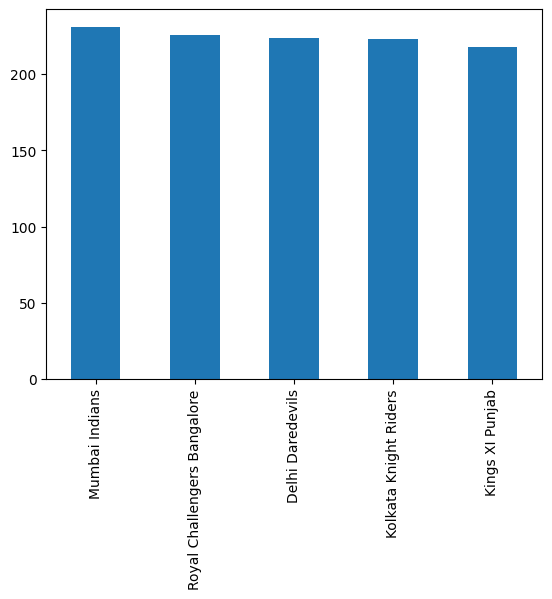

In [50]:
# code here
(ipl_match['Team1'].value_counts() + ipl_match['Team2'].value_counts()).sort_values(ascending=False).head().plot(kind='bar')

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [52]:
# code here
m1 = (ipl_match['Team1'] == 'Mumbai Indians') | (ipl_match['Team2'] == 'Mumbai Indians')
m2 = ipl_match['WinningTeam'] != "Mumbai Indians"
ipl_match[m1 & m2].Player_of_Match.value_counts().head()

,count
Player_of_Match,
KL Rahul,4
SK Raina,4
SPD Smith,4
JC Buttler,3
KC Sangakkara,3


###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [55]:
# code here
def team1_VS_team2(t1,t2):
  m1 = (ipl_match['Team1']==t1) | (ipl_match['Team2']==t2)
  m2 = (ipl_match['Team1']==t2) | (ipl_match['Team2']==t2)
  df1 = ipl_match[m1 & m2]
  print(df1.WinningTeam.value_counts())
  print(df1.Player_of_Match.value_counts().head(1))

team1_VS_team2('Kolkata Knight Riders','Chennai Super Kings')

WinningTeam
Chennai Super Kings            56
Royal Challengers Bangalore     8
Mumbai Indians                  8
Kings XI Punjab                 6
Kolkata Knight Riders           5
Rajasthan Royals                5
Delhi Daredevils                4
Sunrisers Hyderabad             2
Pune Warriors                   1
Kochi Tuskers Kerala            1
Deccan Chargers                 1
Name: count, dtype: int64
Player_of_Match
MS Dhoni    8
Name: count, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

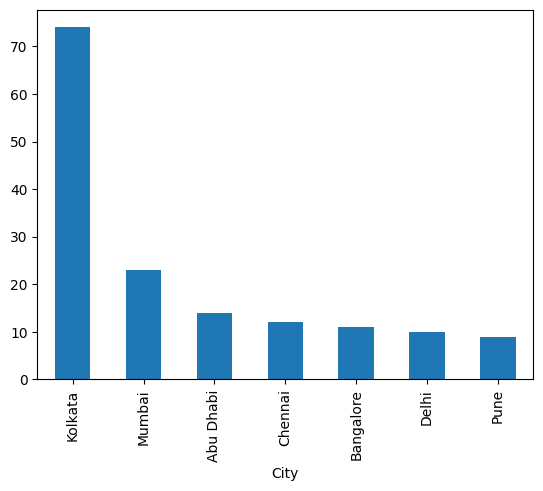

In [62]:
# code here
ipl_match[(ipl_match['Team1'] == 'Kolkata Knight Riders') | (ipl_match['Team2'] == 'Kolkata Knight Riders')].City.value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [63]:
# code here
ipl_match[((ipl_match['Team1'] == 'Mumbai Indians') | (ipl_match['Team2'] == 'Mumbai Indians')) & (ipl_match['Season'] == '2011')]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
703,501270,Chennai,2011-05-27,2011,Qualifier 2,Royal Challengers Bangalore,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,N,Royal Challengers Bangalore,Runs,43.0,NaN,CH Gayle,"['MA Agarwal', 'CH Gayle', 'V Kohli', 'AB de V...","['AC Blizzard', 'SR Tendulkar', 'Harbhajan Sin...",Asad Rauf,SJA Taufel
704,501269,Mumbai,2011-05-25,2011,Elimination Final,Mumbai Indians,Kolkata Knight Riders,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,4.0,NaN,MM Patel,"['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...","['G Gambhir', 'JH Kallis', 'SP Goswami', 'MK T...",Asad Rauf,SJA Taufel
706,501267,Kolkata,2011-05-22,2011,70,Kolkata Knight Riders,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JEC Franklin,"['JH Kallis', 'SP Goswami', 'G Gambhir', 'MK T...","['TL Suman', 'SR Tendulkar', 'Harbhajan Singh'...",SK Tarapore,SJA Taufel
710,501263,Mumbai,2011-05-20,2011,66,Mumbai Indians,Rajasthan Royals,Wankhede Stadium,Mumbai Indians,bat,N,Rajasthan Royals,Wickets,10.0,NaN,SR Watson,"['TL Suman', 'SR Tendulkar', 'AT Rayudu', 'RG ...","['SR Watson', 'R Dravid', 'J Botha', 'AL Menar...",RE Koertzen,PR Reiffel
718,501256,Mumbai,2011-05-14,2011,59,Mumbai Indians,Deccan Chargers,Wankhede Stadium,Deccan Chargers,bat,N,Deccan Chargers,Runs,10.0,NaN,A Mishra,"['SR Tendulkar', 'AC Blizzard', 'AT Rayudu', '...","['MJ Lumb', 'S Sohal', 'KC Sangakkara', 'JP Du...",S Ravi,SK Tarapore
722,501251,Chandigarh,2011-05-10,2011,54,Kings XI Punjab,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,N,Kings XI Punjab,Runs,76.0,NaN,BA Bhatt,"['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'K...","['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...",SK Tarapore,RJ Tucker
727,501246,Mumbai,2011-05-07,2011,49,Mumbai Indians,Delhi Daredevils,Wankhede Stadium,Delhi Daredevils,field,N,Mumbai Indians,Runs,32.0,NaN,AT Rayudu,"['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...","['V Sehwag', 'DA Warner', 'CA Ingram', 'NV Ojh...",K Hariharan,SJA Taufel
732,501241,Mumbai,2011-05-04,2011,44,Pune Warriors,Mumbai Indians,Dr DY Patil Sports Academy,Pune Warriors,field,N,Mumbai Indians,Runs,21.0,NaN,R Sharma,"['JD Ryder', 'MK Pandey', 'GC Smith', 'AA Jhun...","['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...",HDPK Dharmasena,SJA Taufel
736,501237,Mumbai,2011-05-02,2011,40,Mumbai Indians,Kings XI Punjab,Wankhede Stadium,Kings XI Punjab,field,N,Mumbai Indians,Runs,23.0,NaN,KA Pollard,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...","['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'D...",HDPK Dharmasena,PR Reiffel
742,501231,Jaipur,2011-04-29,2011,34,Rajasthan Royals,Mumbai Indians,Sawai Mansingh Stadium,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,J Botha,"['SR Watson', 'R Dravid', 'J Botha', 'LRPL Tay...","['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'RG...",Asad Rauf,SK Tarapore
